In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Amazon Sale Report.csv', encoding = 'unicode_escape')

C:\Users\user\AppData\Local\Temp\ipykernel_8232\929341152.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv', encoding = 'unicode_escape')


In [3]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [4]:
df.shape

(128975, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df[df.duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22


In [7]:
# Drop unrelated columns
df.drop(['Unnamed: 22','promotion-ids'], axis = 1 , inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [9]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
B2B                       0
fulfilled-by          89698
dtype: int64

In [10]:
df.shape

(128975, 22)

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(32395, 22)

In [13]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'fulfilled-by'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32395 entries, 1 to 128891
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               32395 non-null  int64  
 1   Order ID            32395 non-null  object 
 2   Date                32395 non-null  object 
 3   Status              32395 non-null  object 
 4   Fulfilment          32395 non-null  object 
 5   Sales Channel       32395 non-null  object 
 6   ship-service-level  32395 non-null  object 
 7   Style               32395 non-null  object 
 8   SKU                 32395 non-null  object 
 9   Category            32395 non-null  object 
 10  Size                32395 non-null  object 
 11  ASIN                32395 non-null  object 
 12  Courier Status      32395 non-null  object 
 13  Qty                 32395 non-null  int64  
 14  currency            32395 non-null  object 
 15  Amount              32395 non-null  float64
 16  ship-cit

In [15]:
# Changing data types
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [16]:
df['ship-postal-code'].dtype

dtype('int32')

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_8232\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32395 entries, 1 to 128891
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               32395 non-null  int64         
 1   Order ID            32395 non-null  object        
 2   Date                32395 non-null  datetime64[ns]
 3   Status              32395 non-null  object        
 4   Fulfilment          32395 non-null  object        
 5   Sales Channel       32395 non-null  object        
 6   ship-service-level  32395 non-null  object        
 7   Style               32395 non-null  object        
 8   SKU                 32395 non-null  object        
 9   Category            32395 non-null  object        
 10  Size                32395 non-null  object        
 11  ASIN                32395 non-null  object        
 12  Courier Status      32395 non-null  object        
 13  Qty                 32395 non-null  int64         

In [19]:
#renaming Columns
df.rename(columns = {'Qty':'Quality'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Quality,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,kurta,...,Shipped,1,INR,399.0,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
14,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0351,J0351-SET-L,Set,...,Shipped,1,INR,771.0,MUMBAI,MAHARASHTRA,400053,IN,False,Easy Ship
15,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,kurta,...,Shipped,1,INR,544.0,GUNTAKAL,ANDHRA PRADESH,515801,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,128872,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,Shipped,1,INR,999.0,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128873,128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,Shipped,1,INR,1523.0,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128874,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,Shipped,1,INR,854.0,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128887,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,Shipped,1,INR,518.0,NOIDA,UTTAR PRADESH,201301,IN,False,Easy Ship


In [20]:
# Describe method for specific columns(numerical columns)
df[['Qty','Amount']].describe()

,Qty,Amount
count,32395.000000,32395.000000
mean,1.004846,650.522920
std,0.085035,284.913465
min,1.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,631.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


In [21]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'fulfilled-by'],
      dtype='object')

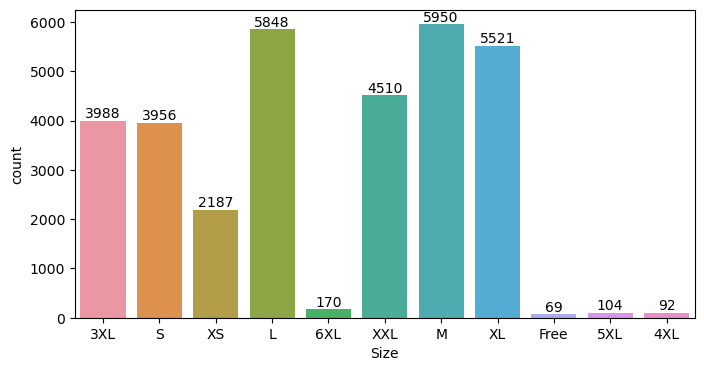

In [22]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'Size', data = df)
for bars in ax.containers:
    ax.bar_label(bars)   

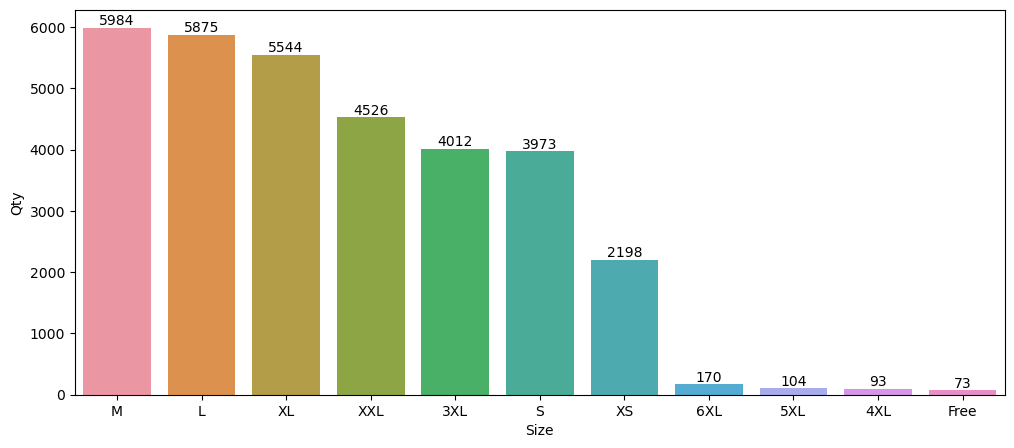

In [23]:
plt.figure(figsize = (12,5))
size_qty = df.groupby(['Size'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)
ax1 = sns.barplot(x= 'Size', y = 'Qty', data = size_qty)
for i in ax1.containers:
    ax1.bar_label(i)
plt.show()

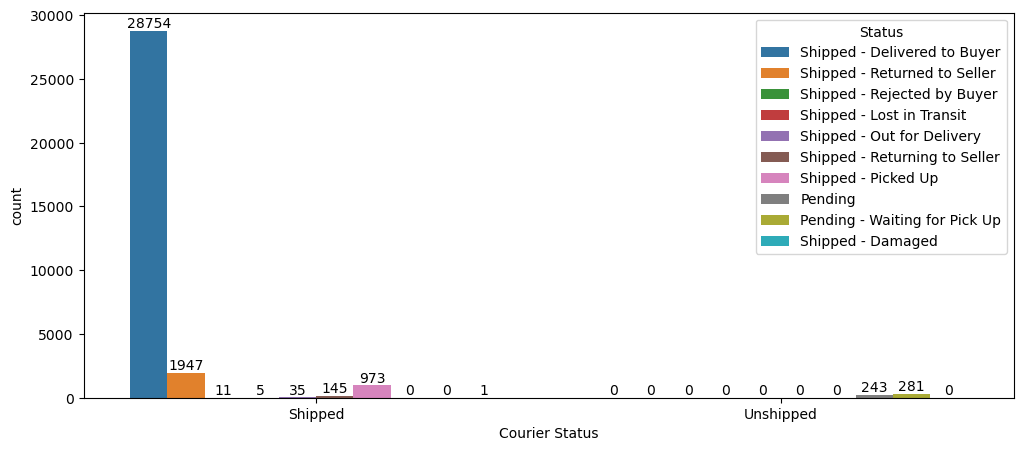

In [24]:
plt.figure(figsize = (12,5))
ax2 = sns.countplot(data = df, x = 'Courier Status', hue = 'Status')
for i in ax2.containers:
    ax2.bar_label(i)
plt.show()

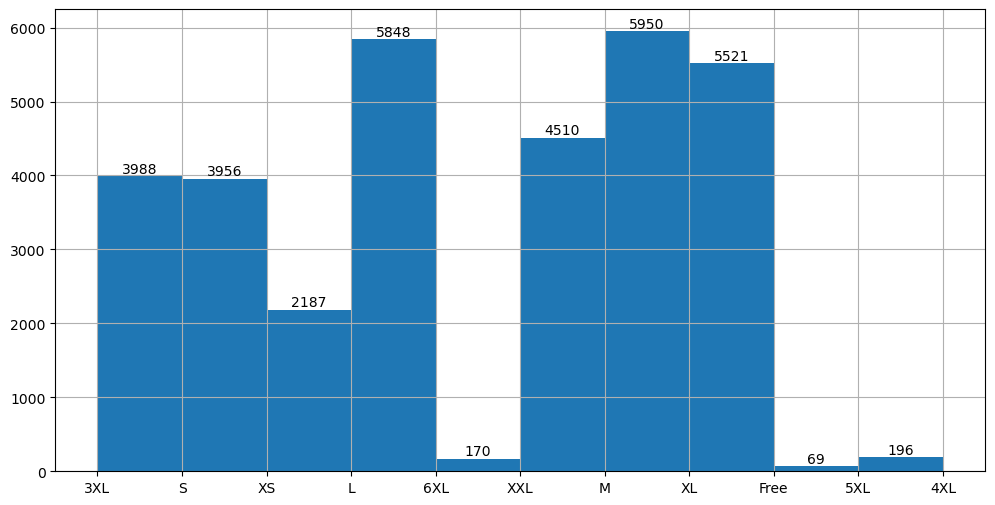

In [25]:
plt.figure(figsize = (12,6))
ax3 = df['Size'].hist()
for i in ax3.containers:
    ax3.bar_label(i)
plt.show()

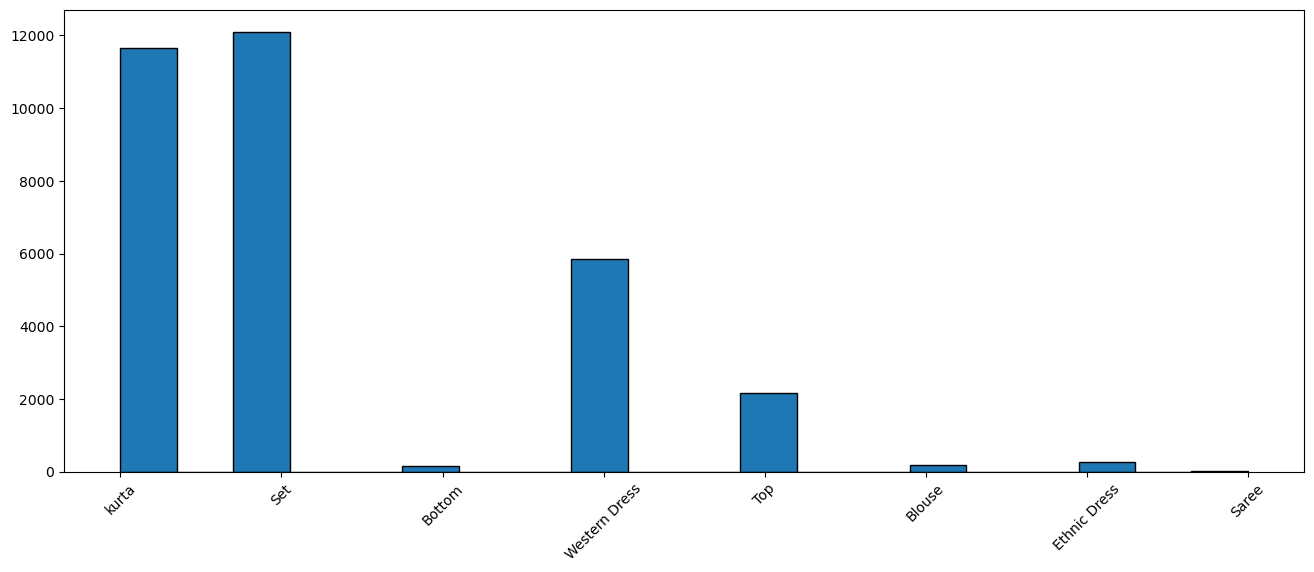

In [26]:
df['Category'] = df['Category'].astype(str)
df_category = df['Category']
plt.figure(figsize = (16,6))
plt.hist(df_category, bins = 20, edgecolor = 'black')
plt.xticks(rotation = 45)
plt.show()

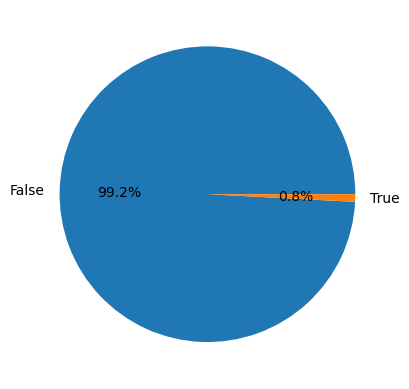

In [27]:
# Check B2B data
b2b = df['B2B'].value_counts()
b2b
#plot Pie Chart
plt.pie(b2b, labels = b2b.index, autopct = '%1.1f%%')
plt.show()

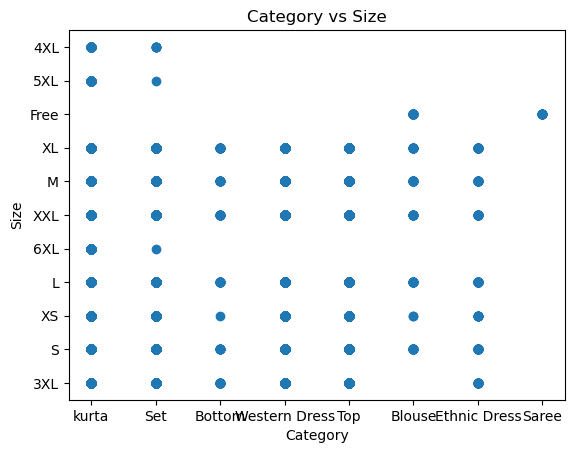

In [28]:
# Prepare for scatter plot
x = df['Category']
y = df['Size']
#plot scatter plot
plt.scatter(x,y)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Category vs Size')
plt.show()

In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'fulfilled-by'],
      dtype='object')

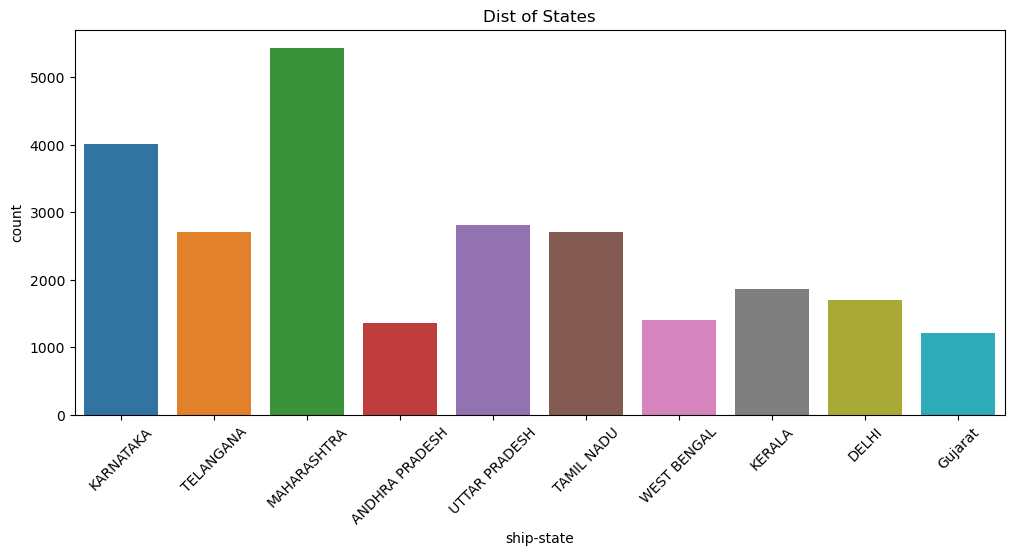

In [30]:
# Top 10 cities who purchased by state
top_10_state = df['ship-state'].value_counts().head(10)
plt.figure(figsize = (12,5))
sns.countplot(data = df[df['ship-state'].isin(top_10_state.index)], x = 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Dist of States')
plt.xticks(rotation = 45)
plt.show()